# Logistic Regression Model
## Data Preperation

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filepath for CSV file with matchup data
filename = 'matchups.csv'

df = pd.read_csv(filename)

X = df.drop(['outcome', 'id', 'date', 'home_team', 'away_team'], axis=1)
y = df['outcome']
ids = df['id']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X_scaled, y, ids, test_size=0.2, shuffle=True)

X


,home_points-per-game,away_points-per-game,home_true-shooting-percentage,away_true-shooting-percentage,home_offensive-rebounds-per-game,away_offensive-rebounds-per-game,home_defensive-rebounds-per-game,away_defensive-rebounds-per-game,home_steals-per-game,away_steals-per-game,home_assist--per--turnover-ratio,away_assist--per--turnover-ratio,home_personal-fouls-per-game,away_personal-fouls-per-game,home_win-pct-all-games,away_win-pct-all-games,home_win-pct-all-gamesLAST3,away_win-pct-all-gamesLAST3
0,109.2,113.0,104.8,110.5,12.6,9.8,32.2,34.0,6.4,9.0,1.710,2.020,22.6,20.3,0.200,0.750,0.000,0.667
1,104.2,124.5,107.4,116.9,11.0,12.0,33.8,33.5,6.2,8.0,1.197,1.983,23.8,23.0,0.000,0.500,0.000,0.333
2,116.3,113.3,120.0,115.7,9.8,10.5,30.5,33.8,5.5,6.3,1.820,1.683,23.0,20.0,0.750,0.750,0.667,1.000
3,107.8,107.8,112.2,116.9,8.8,6.6,33.4,31.0,9.4,6.8,2.218,1.982,22.4,17.2,0.600,0.200,0.667,0.333
4,110.8,116.0,116.9,108.6,7.8,13.2,35.5,32.4,7.3,6.0,1.485,1.853,21.5,23.2,0.750,0.200,0.667,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,110.5,116.5,109.9,114.9,13.3,9.9,32.8,35.6,7.2,6.5,1.368,1.760,20.6,18.2,0.244,0.507,0.333,0.667
1102,117.4,113.5,113.2,113.1,11.3,11.9,32.3,32.3,8.3,7.3,1.858,1.988,21.1,21.4,0.487,0.546,0.333,1.000
1103,112.3,116.0,117.2,115.0,9.7,10.2,31.4,31.4,7.1,7.8,1.868,1.812,18.9,21.2,0.615,0.436,0.333,0.333
1104,117.0,115.2,115.5,120.5,11.2,8.7,37.6,32.2,6.4,7.8,1.754,1.847,18.2,20.4,0.714,0.662,0.667,0.667


## Create model with sklearn and make predictions

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

## Print out Accuracy, Confusion Matrix

In [23]:
print('\nAccuracy:', accuracy)
print(f'Confusion matrix:\n{conf_matrix[0]}\n{conf_matrix[1]}')


Accuracy: 0.6441441441441441
Confusion matrix:
[38 55]
[ 24 105]


## Display coefficients

In [25]:
import matplotlib.pyplot as plt

# Sort the coefficients and labels together based on coefficients
coef = model.coef_[0]
sorted_data = sorted(zip(coef, X.columns), reverse=True)
sorted_coef, sorted_labels = zip(*sorted_data)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coef)), sorted_coef, align='center', alpha=0.7)
plt.xticks(range(len(sorted_coef)), sorted_labels, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Sorted Feature Coefficients')
plt.tight_layout()

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## ROC Curve (Receiver Operating Characteristic)

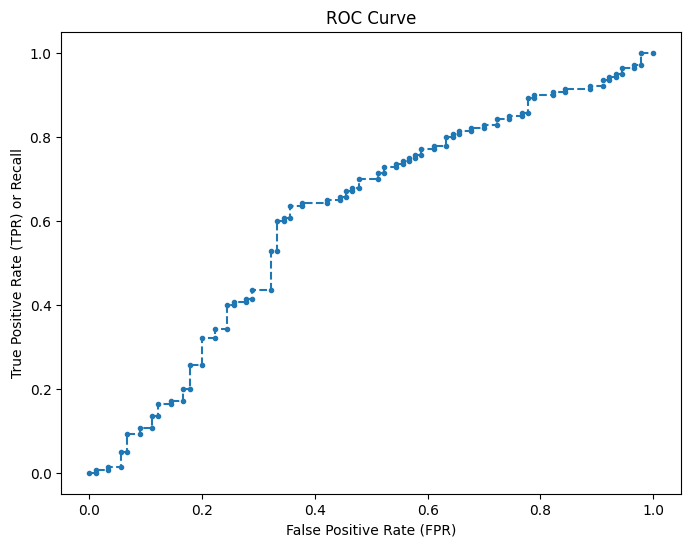

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', marker='.')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.show()

In [16]:
# AUC-ROC score: 0.5 -> Random Classifier, 1.0 -> Perfect Classifier
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {auc}')

AUC-ROC Score: 0.6103968253968254


## Save the Model with Pickle

In [17]:
from joblib import dump, load

filename = 'finalized_model.sav'
dump(model, filename)


['finalized_model.sav']